# Minta zh, bevezetés az adattudományba

## 1. feladat
1.1 Olvass be az iris.csv-t egy dataframe-be  
1.2 Módosítsd a dataframe oszlopai nevét, úgy hogy a pont helyett aláhúzás legyen Pl.: sepal.length --> sepal_length  
1.3 Dobd el azokat a sorokat, amikben van NaN  
1.4 Irattasd ki a 'variety' oszlop különböző értékeit. Minden érték csak egyszer szerepeljen  
1.5 Vizsgáld meg milyen korreláció van a Dataframe egyes oszolopai között. (df.corr) Irasd ki a legnagyobb korrelációt két különböző oszlop között  
1.6 Módosítsd a 'variety' értékét számokra. Setosa --> 0, Versicolor --> 1, Virginica --> 2  
1.7 Dobd el 'sepal.width' oszlopot  
1.8 Jelenítsd meg egy kördiagramon a 'variety' eloszlását, illetve jelenítsd meg labelben az osztályok nevét is.
1.9 A petal_length és petal_width-et jeleníts meg egy scatter plot-on. A osztályonként térjenek el a színek. Az X tengelyen a pental_width, az Y tengelyen pedig a pental_width jelenjen meg.

(numpy, pandas, matplotlib)

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

<bound method Series.unique of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>
PetalLengthCm  PetalWidthCm    0.962757
dtype: float64


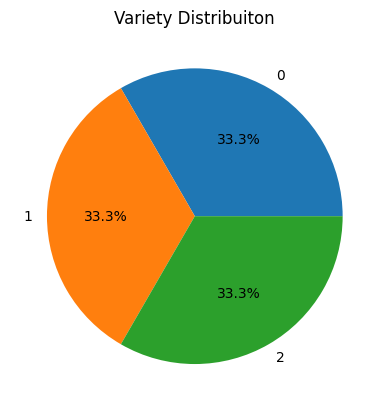

C:\Users\Levi\AppData\Local\Temp\ipykernel_23012\2391183857.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


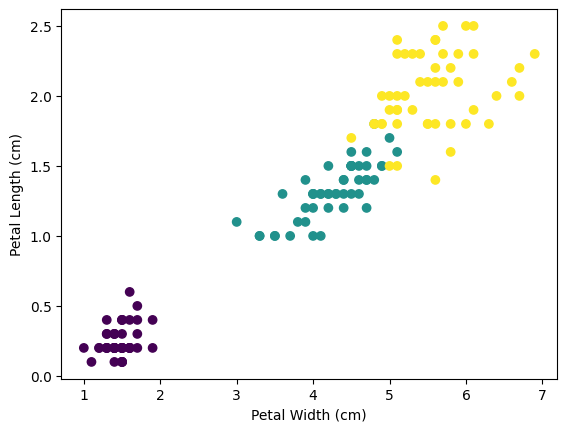

In [38]:
# 1.1
df_data = pd.read_csv('Iris.csv')
df_data.head()

# 1.2
df = df_data.rename(columns=lambda x: x.replace('.', '_'))

# 1.3
df.dropna()

# 1.4
print(df['Species'].unique)

# 1.5
corr_matrix = df.corr(numeric_only=True)
max_corr = corr_matrix.stack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1.0].head(1)

print(max_corr)

# 1.6 
df['Species'] = df['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

df.head()

# 1.7
df.drop('SepalWidthCm', axis=1)

# 1.8
variety_count = df['Species'].value_counts()
labels = ['Setosa', 'Versicolor', 'Virginica']

plt.pie(variety_count, labels=variety_count.index, autopct='%1.1f%%')

plt.title('Variety Distribuiton')

plt.show()

# 1.9
fig = plt.figure()

ax1 = fig.add_subplot()

ax1.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c = df['Species'])
ax1.set_ylabel('Petal Length (cm)')
ax1.set_xlabel('Petal Width (cm)')

fig.show()


## 2. feladat
2.1 A 'variety' legyen a cél függvény, a maradék oszlopok pedig a tanító halmaz  
2.2 Spliteld szét a dataframe-t. A tanító adathalmaz legyen 70%, a test pedig 30%. A random state pedig legyen 42  

(sklearn)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [50]:
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. feladat
3.1 Taníts fel egy decision tree-t  
3.2 Írtattasd ki a modell pontosságát  
3.3 Jelenítsd meg a decision tree-t matplotlib segítségével  

(sklearn)

1.0


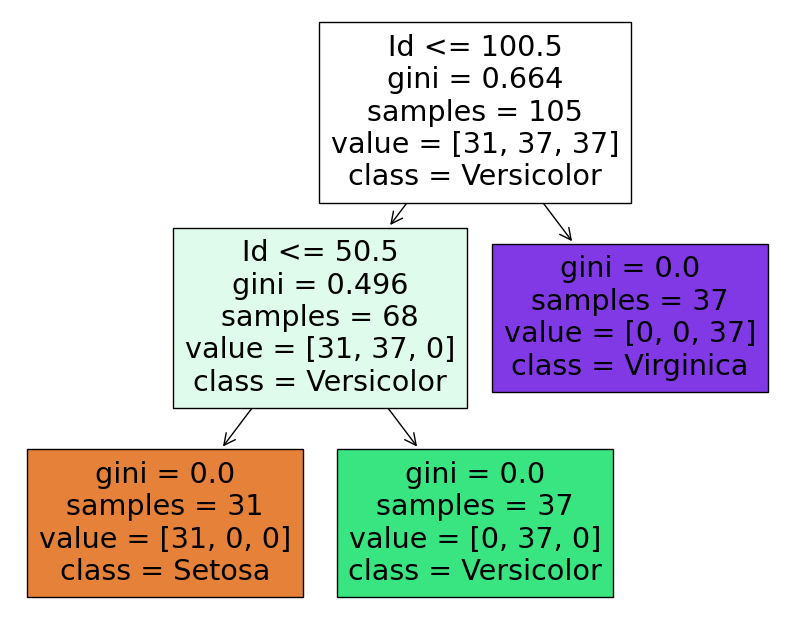

In [54]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
print(accuracy_score(y_test, y_preds))

plt.figure(figsize=(10, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['Setosa', 'Versicolor', 'Virginica'], filled=True)
plt.show()


## 4. feladat 
4.1 Értékeld a tanításodat 5 mondatban. Pl.: mivel lehet pontosítani a modellt, milyen más adatfeldolgozást lehetne csinálni.